# Introduction to tropical geometry

#### Author: Matteo Caorsi

In this notebook I will introduce the basics of tropical geometry from an intuitive perspective rather than focussing on the formalism.

## Introduction

Tropical geometry attempts to give a combinatorial and simplified description of complex algebraic geometry by substituting $\mathbb C$ with the tropical semiring $\bar{ \mathbb R}$ defined below.

Many combinatorial objects (polyhedra, fans, cones,...) will appear out of the tropical vareity and their characteristics will define many of the known algebraic and topological properties of the corresponding complex counterparts.

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import collections  as coll

## Tropical semiring
Let $a,b \in \bar{ \mathbb R}$ where $\bar{ \mathbb R} = \mathbb R \cap \{+\infty\}$

Define the operations is the tropical semiring as:
 - $a \oplus b := min(a,b)$
 - $a \otimes b := a + b$

There is no notion of $\ominus$, hence the semi-ring structure and not the full ring one.

#### Neutral elements:

 - addition: $+\infty$
 - multiplication: $0$
 
These are the neutral elements of the operations, as we can easily check from the defintion.

In [2]:
T = TropicalSemiring(QQ)

print(T(1)+T(2))
print(T(1)*T(2/3))

1
5/3


In [3]:
# Neutral element multiplication
T(0)*T(101)
assert T(0) == T.one()

In [4]:
# Neutral element addition
T.infinity() + T(101)
assert T.infinity()  == T.zero()

## Tropical variety

We need first to define the tropicalisation of a polynomial equaltion.

Start with the polynomial $f \in \mathbb Q[x, y], f = x^2 + 2y^3 + 1$.

Then: 
$$trop(f) = x \otimes x \oplus 2 \otimes y \otimes y \otimes y \oplus 1 = min(2x, 2+2y, 1)$$

The above construction generalises to all dimensions.

Then, you can define a tropical variety as:
$$V(trop(f)) := \{ w \in \bar{ \mathbb R}^n : trop(f)(w)=\infty \text{ or the minimum in } trop(f)(w) \text{ is attained twice}\}$$

Notice that the above is the *correct* tropical version of $V(f) = \{x \in \mathbb R^n | f(x)=0\}$

In [5]:
# slow plotting algorithm
# taken from https://wangweikun.com/math-software/graphing-tropical-curve-in-sagemath/


def plot_tropical_curve(trop: str = "u**2+t**(-1)*w**2+u*w+u+t*w+t**(-1)", 
                        maxmin: bool = True, 
                        color="blue"):
    """This function plots the tropical curves.
    
    Args:
        trop (str): this is the curve written in the variables
            `u`and `w` with paramter `t`. `t` is the parameter
            of the Puiseux ring, used to parametrize coefficients
            and whose valuation gives the tropicalisation.
            Example of curve:
            ```
            u**2+t**(-1)*w**2+u*w+u+t*w+t**(-1)
            ```
        maxmin (bool): this flagg is to consider the tropical or the
            polar semiring. If `True`, the `min` is used for additions
            
    Returns:
        (list): list of elements to be plotted
    """
    var('xmin, xmax, ymin, ymax')
    xmin=-10
    xmax=10
    ymin=-10
    ymax=10
    _.<t,u,w> = LaurentPolynomialRing(QQ)
    f=eval(trop)
    f_exp=f.exponents()
    var("x, y")
    S=[]
    for i in range(len(f_exp)):
        if maxmin:
            g=f_exp[i][0]-f_exp[i][1]*x-f_exp[i][2]*y  # change + to - if you want to use min instead of max for tropicalization 
        else:
            g=f_exp[i][0]+f_exp[i][1]*x+f_exp[i][2]*y
        S.append(g) 
    Eq=[]
    X_lb=[]
    X_ub=[]
    Y_lb=[]
    Y_ub=[]
    print("plotting tropical curve... \n")
    for ii in range(0,len(f_exp)-1):
        print(ii, " / ",len(f_exp)-1,end='\r')
        for j in range(ii+1,len(f_exp)):
            P=[]
            P.append(S[ii]>=S[j])
            P.append(S[j]>=S[ii])
            for k in range(0,len(f_exp)):
                if k!=ii and k!= j:
                    P.append(S[ii]>=S[k])
            sol=solve_ineq(P,[x,y])
            if len(sol)==2:
                if str(sol[1][1].lhs())=='x' or str(sol[1][1].rhs())=='x':
                    if RealSet(sol[1][1]).contains(xmin)==True: 
                        X_lb.append(xmin)
                        X_ub.append(sol[0][0].rhs())
                        Y_lb.append(ymin)
                        Y_ub.append(ymax)
                        Eq.append(S[ii]-S[j])
                    elif RealSet(sol[1][1]).contains(xmax)==True:
                        X_lb.append(sol[0][0].rhs())
                        X_ub.append(xmax)
                        Y_lb.append(ymin)
                        Y_ub.append(ymax)
                        Eq.append(S[ii]-S[j]) 
                elif str(sol[1][1].lhs())=='y' or str(sol[1][1].rhs())=='y':
                    if RealSet(sol[1][1]).contains(ymin)==True:
                        X_lb.append(xmin)
                        X_ub.append(xmax)
                        Y_lb.append(ymin)
                        Y_ub.append(sol[0][1].rhs())
                        Eq.append(S[ii]-S[j]) 
                    elif RealSet(sol[1][1]).contains(ymax)==True:
                        X_lb.append(xmin)
                        X_ub.append(xmax)
                        Y_lb.append(sol[0][1].rhs())
                        Y_ub.append(ymax)
                        Eq.append(S[ii]-S[j])        
            elif len(sol)==3:
                if sol[0][1].rhs()==sol[1][1].rhs():
                    X_lb.append(min(sol[0][0].rhs(),sol[1][0].rhs()))
                    X_ub.append(max(sol[0][0].rhs(),sol[1][0].rhs()))
                    Y_lb.append(ymin)
                    Y_ub.append(ymax)
                    Eq.append(S[ii]-S[j])
                else:
                    X_lb.append(xmin)
                    X_ub.append(xmax)
                    Y_lb.append(min(sol[0][1].rhs(),sol[1][1].rhs()))
                    Y_ub.append(max(sol[0][1].rhs(),sol[1][1].rhs()))
                    Eq.append(S[ii]-S[j])
    gr=[]
    for jj in range(0,len(Eq)):
        ##print(Eq[i])  ## remove # if you want to see the equation of the line
        gr.append(implicit_plot(Eq[jj],(x,X_lb[jj],X_ub[jj]),(y,Y_lb[jj],Y_ub[jj]), color=color))
    return sum(gr)
    


plotting tropical curve... 



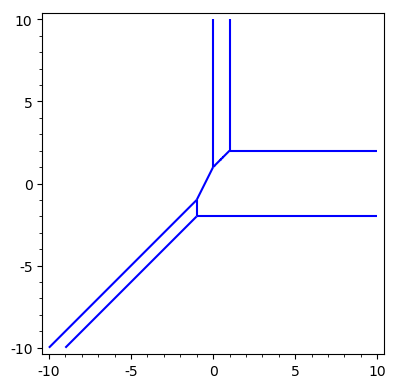

In [6]:
plot_tropical_curve()  # with default curve

### Tropical line

The tropical line (in $\mathbb Q[x, y]$) is defined as

$$l = x \oplus y \oplus 0$$

plotting tropical curve... 



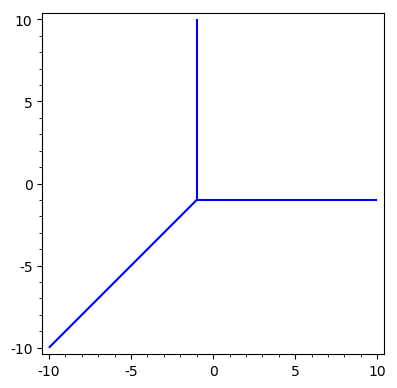

In [7]:
line_fig = plot_tropical_curve("u + w + t")  # tropical line
line_fig

## Tropical polytope

To each tropical variety, it is possible to associate a polytope.

Such polytope is the convex hull of the points in the monomial lattice.

The monomial lattice of $\mathbb Q[x_1, ..., x_n]$ is the lattice isomorphic to $\mathbb Z^n$ in which the coordinates of the point $m$ correspond to the monomial $x^m$, e.g. $m = (1,2,0,3)$ then $x^m = x_1x_2^2x_4^3$. 

In [8]:
def tropical_polyhedron(f: str = "u**2 - 2*w**3 + u*w - 1"):
    """This functions build the tropical polyhedron
    associated to the defining polynomial equation.
    
    Args:
        f (str): polynomial in x,y,t where t is 
        the Puiseux coefficient, with opposite
        sign with respect to thhe valuation
        
    Returns:
        (Polyhedron): the tropical polyhedron
    """
    _.<u, w, t> = LaurentPolynomialRing(QQ)
    f_poly = eval(f)
    vtx = f_poly.exponents()
    hull = Polyhedron(vertices = vtx)
    return hull

p = tropical_polyhedron()  # with default curve


In [9]:
p.vertices()  # only the external convex hull is relevant

(A vertex at (0, 0, 0), A vertex at (0, 3, 0), A vertex at (2, 0, 0))

But how do we relate this polytope to the tropical variety?

In [10]:
# We use the t-coefficients adding an additional dimension
f = "u**2 - 2*w**3 + u*w - 1"
_.<u, w> = LaurentPolynomialRing(QQ)
f_poly = eval(f)
vtx3 = np.hstack((np.array(f_poly.exponents()),np.array(f_poly.coefficients()).reshape(-1,1)))
hull3 = Polyhedron(vertices = vtx3)
hull3.plot()


Graphics3d Object

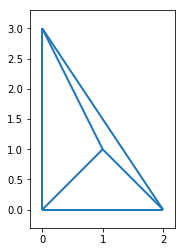

In [11]:

def plot_2d_refinement(hull3):
    """Function to plot the 2D projection
    of the 3D polytope associated to the tropical
    curve.
    
    Args:
        hull3 (Polyhedron): 3D polyhedron with the first 
            two coordinates being the exponential and the
            third one being the coefficient.

    """
    edges = hull3.bounded_edges()

    lines = []
    for edge in edges:
        lines.append((edge[0].vector().list()[:2], edge[1].vector().list()[:2]))

    lc = coll.LineCollection(lines, linewidths=2)
    fig, ax = plt.subplots()
    ax.add_collection(lc)
    ax.autoscale()
    ax.margins(0.1)
    ax.set_aspect(1)
    return fig

plot_2d_refinement(hull3);

### Duality with polytopes

As one can notice, the 2D elements in the interior of the refined polytope, do match with the number of points in the tropical plot.

Also the segments connecting the points in the tropical plot, do correspond in 1:1 to the edges of the refined polytope.

This is in general a theorem: the polytope whose vertices are the exponents and the coefficients contain all the information about tropical varieties.


plotting tropical curve... 



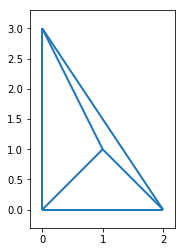

In [12]:
ff = "t*u**2 + t**(-2)*w**3 + t*u*w + t**(-1)"  # elliptic curve!
fig_g1 = plot_tropical_curve(ff, False)
fig2 = plot_2d_refinement(tropical_polyhedron(ff));


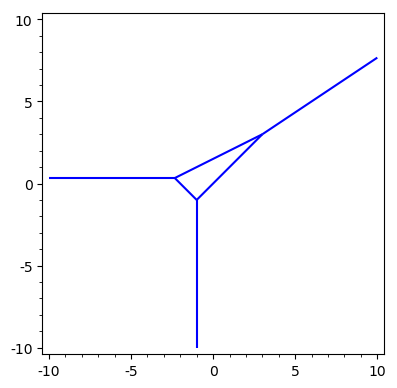

In [13]:
fig_g1

## Genus of a curve

The genus of a curve represents the number of holes of the curve. The basic example in standard algebraic geometries of curves of genus 0 is the 2-sphere $\mathbb S^2$. For genus 1, one usually draws a torus $\mathbb T^2 = \mathbb S^1 \times \mathbb S^1$.

It is possible to see the genus also in tropical geometry: just cound the number of cycles in the tropical curve to get the genus of such curve. 

In terms of dual polytopes, the genus is *the number of interior points*!

Check the example below.


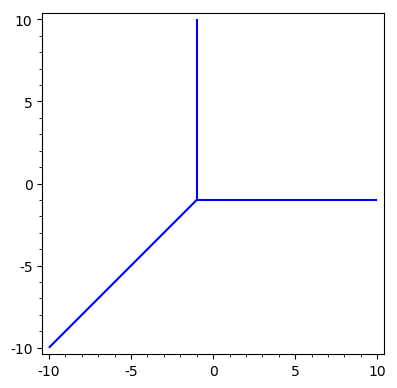

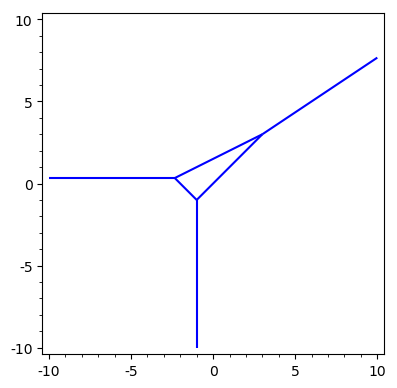

In [14]:
# genus = 0, a line
line_fig.show()
# genus = 1, an elliptic curve
fig_g1

## Puiseux coefficients


We have already seen how to tropicalise a polynomial. There is a more general approach: it uses valueations.
    
In a nutshell, this is the formula: let $f = \sum_i a_i x^{m_i}, m_i \in \mathbb Z^n$, then
$$trop(f) = \bigoplus val(a_i)\otimes x^{\otimes m_i}$$

What is the most general valuation, in particular that one that makes it natural to describe the polytope associated to a tropical variety? The valuation is the valuation that takes $t^a \in \mathbb C\{\{t\}\}$ the *Puiseaux field* to $a$, i.e. $val(t^a) = a$

Hence, we can conside as the **canonical tropicalisation** of the polynomial $f = x^2 + 2y^3 + xy -1$ is $\mathbb Q[x,y]$ the tropicalisation of $f = t^1x^2 + t^2y^3 + t^1xy + t^{-1}$ in $\mathbb C\{\{t\}\}[x, y]$



forget:  [1, 2]
forget:  [1, 3]
forget:  [2, 3]
forget:  [1, 4]
forget:  [2, 4]
forget:  [3, 4]


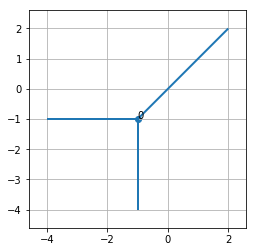

In [15]:
# using the puiseux ring, we can create a faster plotting function

def plot_tropical_curve_from_intersection(I):
    """This function is much faster than the previous 
    tropical curve plot, but it requires the use of Puiseux
    coefficients and also itersection with `t=-1`.
    
    Args:
        I (ideal of QQ[t,x,y]): this is the equation defining
            the tropical curve. Do not forget to also multiply
            by the factor `(t+1)` to make sure that you are
            intersecting with the `t = -1` hyperplane
            
    Returns:
        (matplolib.pyplot.Figure): the plot of the curve
    """
    gf = I.groebner_fan()
    pf = gf.tropical_intersection()
    rs = pf.rays()
    mc = pf.maximal_cones()
    pts = dict()
    directions = dict()
    for i, r in enumerate(rs):
        if r[0] == -1:
            pts[i] = np.array([r[1], r[2]])
        elif r[0] == 0:
            directions[i] = np.array([r[1], r[2]])
    # build lines
    # print(pts.values())
    # print(directions)
    lines = []
    do_loop = True
    try:
        mc[2]
    except KeyError:
        do_loop = False
    if do_loop:
        for pair in mc[2]:
            # print(pair)
            try:
                lines.append([pts[pair[0]], pts[pair[1]]])
            except KeyError:
                try:
                    lines.append([pts[pair[1]] + 3*directions[pair[0]], pts[pair[1]]])
                except KeyError:
                    try:
                        lines.append([pts[pair[0]] + 3*directions[pair[1]], pts[pair[0]]])
                    except KeyError:
                        print("forget: " , pair)
    else:
        lines = [[[0,0], -3*directions[0]], [[0,0], -3*directions[1]], [[0,0], -3*directions[2]]]

    lc = coll.LineCollection(lines, linewidths=2)
    fig, ax = plt.subplots()
    ax.add_collection(lc)
    try:
        ax.scatter(*zip(*pts.values()))
    except TypeError:
        pass
    for jj in pts.keys():
        ax.annotate(str(jj), (pts[jj][0], pts[jj][1]))
    ax.autoscale()
    ax.margins(0.1)
    ax.grid()
    ax.set_aspect(1)
    return fig
    
    
Rt.<t,x,y> = QQ[]
# f = 1x + 1y + 0
# f = f/1
f = Rt.ideal([(x + y + t)*(t+1)])
# t is the variable in the Puiseux ring
fig = plot_tropical_curve_from_intersection(f)


forget:  [4, 5]
forget:  [4, 6]
forget:  [5, 6]
forget:  [4, 7]
forget:  [5, 7]
forget:  [6, 7]


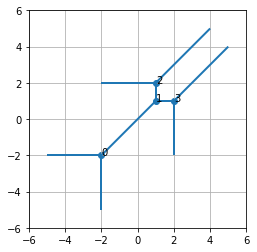

In [16]:

f2 = Rt.ideal([(t^2*x^2+t*x*y+t^2*y^2+x+y+t^2)*(t+1)])
plot_tropical_curve_from_intersection(f2);

## Amoebas

When you consider a point $(x,y) \in (\mathbb C^*)^2$, you can map it via the logaritm to $\mathbb R^2$ in the following way:
$$ (x,y) \mapsto (\log(|x|), \log(|y|))$$
For a polynomial $f \in \mathbb C[x,y]$, the image of $V(f) := \{ f = 0 \}$ under the logarithmic map is called **Amoeba**. You will notice that it is closely related to the tropical curve (using the `max` and not the `min` addition)!

In [17]:

# slow code, modified from https://wangweikun.com/math-software/tropical-amoeba-in-sagemath/
def plot_amoeba(string, base=2.71828182845905):
    """This functions plots the amoeba of a polynomial

    Args:
        string (str): this is the definition of the 
            polynomial with variables t,u,w, where t
            are the Puiseux coefficients
        base (float): the base of the logarithm

    Returns:
        (matplotli.pyplot.Figure): the plot of the
            amoeba

    """
    xmin=-5
    xmax=5
    ymin=-5
    ymax=5
    grid_step=200
    angle_step=50
    var('t,u,w')
    t=base
    f=eval(string)
    x_grid_step=(xmax-xmin)/grid_step
    y_grid_step=(ymax-ymin)/grid_step
    List_points=[]
    print("plotting the amoeba:")
    for j1 in range(1, grid_step):
        print(j1, " / ", grid_step, "     ", end='\r')
        r1=xmin+j1*x_grid_step
        for k1 in range(0, angle_step):
            theta1=(k1/angle_step)*2*3.141592653589*sqrt(-1)
            z1=t**r1*exp(theta1)
            g1=f.substitute(u=z1)
            S1=g1.roots(w,ring=ComplexField(prec=10), multiplicities=False)
            for l1 in S1:
                ab_log1=log(abs(l1), base)
                if ab_log1>ymin and ab_log1<ymax :
                    List_points.append((r1,ab_log1))
    for j2 in range(1, grid_step):
        r2=ymin+j2*y_grid_step
        print(j2, " / ", grid_step, "     ", end='\r')
        for k2 in range(0,angle_step):
            theta2=(k2/angle_step)*2*3.141592653589*sqrt(-1)
            z2=t**r2*exp(theta2)
            g2=f.substitute(w=z2)
            S2=g2.roots(u,ring=ComplexField(prec=10), multiplicities=False)
            for l2 in S2:
                ab_log2=log(abs(l2), base)
                if ab_log2>xmin and ab_log2<xmax :
                    List_points.append((ab_log2,r2))
    return list_plot(List_points, size=2, aspect_ratio=1)

plotting the amoeba:


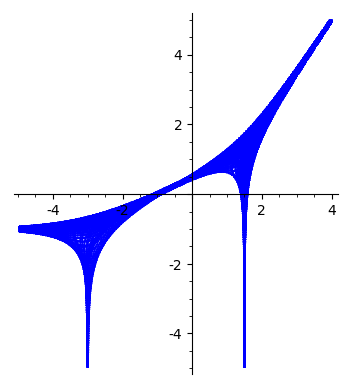

In [18]:
string = "1+u**3+t**3*u+w+t**2*w**2+t*u*w"
plot_amoeba(string)

plotting tropical curve... 



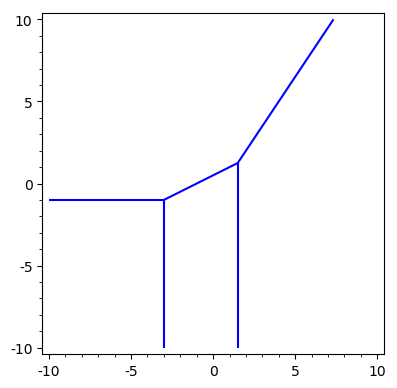

In [19]:
plot_tropical_curve(string, maxmin=False)

The plot of the amoeba above represents a genus 0 curve ( a Riemann sphere) with 6 punctures: the six points are those (taken with multiplicity) lying at the end of the tentables of the amoeba. These punctures are remove as we only condiered points over $(\mathbb C^*)^2$. In coordinates they are $(x,0), (0,y), (\infty, \infty)$

#### Theorem
In the limit of the base of the logarithm in the amoeba $b \to +\infty$, the amoeba becomes the tropical curve

plotting the amoeba:


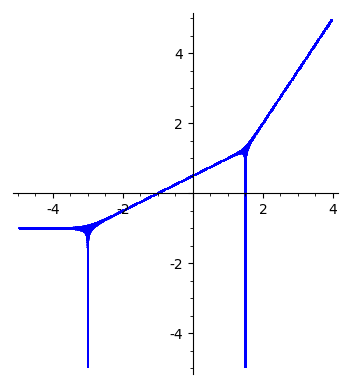

In [20]:
plot_amoeba(string, 100)

## Fundamental theorem
This theorem says that the tropicalisation of the polynomial equations corresponds to the tropicalisation of the solutions:
$$V(trop(f)) = trop(V(f))$$

While we have already encountered the left-hand side, the right hand side is to be properly defined: check the next section.

### Tropicalisation of ideals
Let $I = <f_1, ..., f_n>$ be an ideal in a polynomial ring,
$$trop(I) := < trop(g), g \in I>$$

Notice that it is in general not enough to only consider the tropicalisation of the generators of the ideal! If you do so, you end-up with a tropical pre-vareity that is in general larger than the actual tropicalisation.

$$trop(V(I)) := \cap _{f \in trop(I)}V(f)$$
    
#### Theorem (Kapranov et al.)
$$trop(V(I)) := closure\{(val(a_1), ..., val(a_n)), a_1, ..., a_n \in V(I)\},$$

where the valuation is the Puiseux series one.

## Tropical compaticfication

What are the most natural ways of compatifying a curve? Embed it into $\mathbb P^2$ or in $\mathbb P^1 \times \mathbb P^1$ by homogenising or bi-homogenising the polynomial defining the curve (homogeneous in each variable separately).

There is also a tropical notion of compactification: just add the points corresponding to the edges of the Newton polygon of the curve! These points do correspond to the points containing at least one coordinate equal to zero.

## Tropical linear subspaces

Given a $d \times n$ matrix with $d < n$, some of the columns will be related y some linear relations.
The linear relations, in the theory of matroids, are called *circuits*. Let $L$ be the set of all linear equations where the variables are the columns $x_i$, $i = 1, ..., n$.

Let's define
$$trop(L) = \cap_{l \in L} V(trop(l))$$

where we use the trivial valuation $val(m)=0, \forall m \in \mathbb R$.

In [21]:
A = Matrix(QQ, [[1, 0, 2], 
                [0, 1, -1]])
M1 = Matroid(A)
list(M1.circuits())  # this represents the linear relation between the columns of A

[frozenset({0, 1, 2})]

In [22]:
M1.basis()  # as the rank is 2!

frozenset({0, 2})

In [23]:
# build the polytope as the convex hull of the sums of basis elements
polytope = M1.matroid_polytope()
polytope.vertices()

(A vertex at (0, 1, 1), A vertex at (1, 0, 1), A vertex at (1, 1, 0))

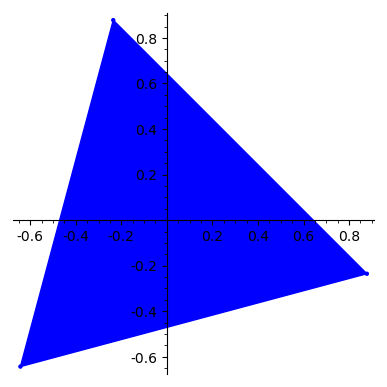

In [24]:
# project it to 2D
proj = polytope.schlegel_projection()
proj.plot()

### Observation
The dual fan of this polytope corresponds to the rays defining the tropical line!!

In [25]:
# Theese are all possible basis of the matroid
# you need to check the minors of the matrix to get them
list(M1.bases())

[frozenset({0, 1}), frozenset({1, 2}), frozenset({0, 2})]

The minors of the matrices, defining all possible bases, are the first step to define the Plücker coordinates. These coordinates are useful to describe spaces of matrices, as to each matrix you associate a unique vector: the vector of all the minors.

Notice that a matrix $m \times n$ (with $m < n$)tells you how to embed an $m$-dimensional subplane into an $n$-dimensional space. Hence, the moduli space of the matrices is exactly the **Grassmannian Gr(m,n)**!

In [26]:
# plucker coordinates for the matrix
plucker = A.minors(2)
d = A.dimensions()[0]
# subsets of length len(plucker) - 1
subs = Subsets(list(range(len(plucker))), d+1).list()
var(",".join(["x"+str(i) for i in range(d+1)]))
# get the exact linear relations
S = SymmetricGroup(list(range(d+1)))
linear_relations = [sum([(-1)**(S(tuple(sub)).sign())*plucker[i]*eval("x"+str(i)) for i in sub]) for sub in subs]
linear_relations

[-x0 + x1 + 2*x2]

Use these relations as the basis to define the **tropical linear spaces**. These are larger than the tropicalisation of the linear spaces. Since we do not really care about the coefficeints, as we can use the *trivial valuation*, the notion of **circuits is enough**.

### Connection with matriod theory

Given all of the above, **for a generic matroid**, it is possible to consider thhe tropical linear spaces associated to each circuit. 
#### E.g.
For a circuit $\{1,2,4\}$, the tropical linear space is $f = x_1\oplus x_2\oplus x_3$, and one can compute $V(f)$. Given all the circuits, one can eventually take the intersection:

$$trop(L) = \cap_{f \in circuits}V(f)$$

In [27]:
B = Matrix(QQ, [[1, -1, 1, -1], 
                [1, 1, 0, 0]])
M2 = Matroid(B)
print(list(M2.circuits()))  # the linear relations between the columns
pol2 = M2.matroid_polytope()
print(pol2.vertices_list())
pol2.plot()

[frozenset({0, 1, 2}), frozenset({0, 1, 3}), frozenset({2, 3})]
[[0, 1, 0, 1], [0, 1, 1, 0], [1, 0, 0, 1], [1, 0, 1, 0], [1, 1, 0, 0]]


Graphics3d Object

#### Theorem (Sturmfeld)

The tropical linear space is the dual fan of the *loopless* faces of the matroid polytope. 

*Loopless* face means that every element corresponding to the vertices belong to the basis.

In [28]:
pol2.f_vector()  # 5 vertices and 8 edges. indeed it looks like a pyramid

(1, 5, 8, 5, 1)

In [29]:
# these are the top dim faces
facets = pol2.facets()

for j, fac in enumerate([np.sum([v.vector().list() for v in fac.vertices()],0) for fac in facets]):
    if 0 in fac:
        print("facet ",j, " is not loopless!")

facet  0  is not loopless!
facet  2  is not loopless!


Indeed, we find only 3 loopless facets corresponding to the three rays of a tropical line.

### Application to phylogenetic trees

The uniform matroid $U(2,4)$ has a polytope that looks like the one-point-suspension of the square. 

This matroid can be split into two pyramids, each leading to a tropica line with three rays.

When you glue back the two pyramids, you will find a phylogenetic tree with 4 leaves. Hence, all the possible decomposition of $U(2,4)$ do correspond to the moduli space of phylogenetic trees with 4 leaves.

The results can be generalised to $U(2,n)$ for $n$ leaves.

In [30]:
# list of possible triangulations
pol2.triangulate()

# split the polytope into different triangles
# to each loopless triangle, associate a ray of the tropical linear space
# glue the rays along the faces that you glue together to recontruct the polytope
# For the matroid U(2,4) you get the space of pylogenetic trees with 4 leaves!

(<0,1,2,4>, <1,2,3,4>)

## Tropical intersection

Can we intersect tropical curves? What is the degree of intersection (i.e. the number of points)?

#### Tropical Bézout theorem
Two tropical varieties $V(f)$ and $V(g)$ of degree $deg_f$ and $deg_g$ respectively intersect in $deg_f * deg_g$ points counting multiplicities.

#### Stable intersection theorem
There is always a $deg_f * deg_g$ number of points, counted with multiplicities. To prove this, move the curves far away, so that only the infintie rays intesect (i.e. the tentacles of the amoebas). Move them closely (homotopically) and by stability the points are not removed or generated.

plotting tropical curve... 

plotting tropical curve... 



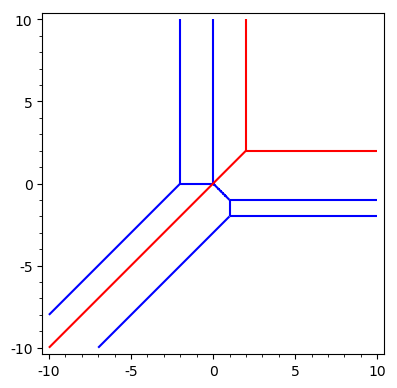

In [31]:
plot_tropical_curve("t**(-2)*u**2 + u*w + t**(-3)*w**2 + t**(-1)*w + u + 1") + plot_tropical_curve("u + w + t**(-2)", color="red")



To check the degree, simply count the number of rays direcitons (with degeneracies): that is the degree

forget:  [5, 6]
forget:  [5, 7]
forget:  [6, 7]
forget:  [5, 8]
forget:  [7, 8]
forget:  [5, 9]
forget:  [6, 9]
forget:  [6, 10]
forget:  [7, 10]
forget:  [8, 10]
forget:  [9, 10]


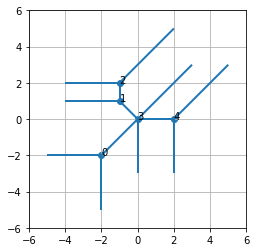

In [32]:
# notice that the valuation is reversed (just the symmatric curve, no big deal)
R3.<t,u,w> = QQ[]
f3 = R3.ideal([(t**(2)*u**2 + u*w + t**(3)*w**2 + t**(1)*w + u + 1)*(u + w + t**(2))*(t+1)])
plot_tropical_curve_from_intersection(f3);

forget:  [1, 2]
forget:  [1, 3]
forget:  [2, 3]


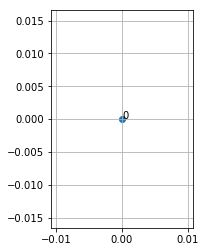

In [33]:
# if you are interested in finding the points of intersection and plotting them:
f4 = R3.ideal([(t**(2)*u**2 + u*w + t**(3)*w**2 + t**(1)*w + u + 1)*(t+1),(u + w + t**(2))*(t+1)])
plot_tropical_curve_from_intersection(f4);

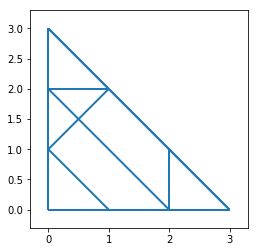

In [34]:
# this is the dual polyhedron

f3 = "(t**(2)*u**2 + u*w + t**(3)*w**2 + t**(1)*w + u + 1)*(u + w + t**(2))"
plot_2d_refinement(tropical_polyhedron(f3));


The information about the multiplicities of the intersection points can be found in the areas of each of the internal faces of the subdivided polytope.

In particular, the *area* of the quadrilaterals in the subdivision, if it is not $1$, means that there are non-transverse intersections.

Here below the polytopes of the two curves separately.

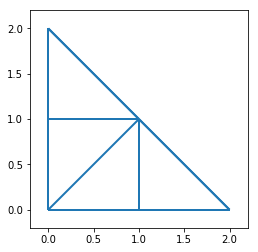

In [35]:

f5 = "(t**(2)*u**2 + u*w + t**(3)*w**2 + t**(1)*w + u + 1)" 
plot_2d_refinement(tropical_polyhedron(f5));

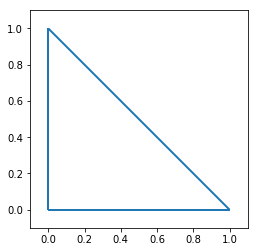

In [36]:
f6 = "(u + w + t**(2))"
plot_2d_refinement(tropical_polyhedron(f6));

forget:  [7, 8]
forget:  [7, 9]
forget:  [8, 9]
forget:  [7, 10]
forget:  [8, 10]
forget:  [7, 11]
forget:  [9, 11]
forget:  [8, 12]
forget:  [9, 12]
forget:  [10, 11]
forget:  [11, 12]


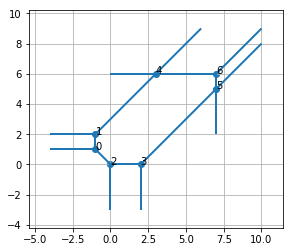

In [37]:
# transverse intersections
f3 = R3.ideal([(t**(2)*u**2 + u*w + t**(3)*w**2 + t**(1)*w + u + 1)*(t**7*u + t**6*w + 1)*(t+1)])
plot_tropical_curve_from_intersection(f3);

forget:  [2, 3]
forget:  [2, 4]
forget:  [3, 4]


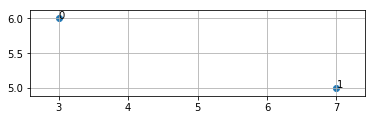

In [38]:
# if you are interested in finding the points of intersection and plotting them:
f4 = R3.ideal([(t**(2)*u**2 + u*w + t**(3)*w**2 + t**(1)*w + u + 1)*(t+1),(t**7*u + t**6*w + 1)*(t+1)])
plot_tropical_curve_from_intersection(f4);

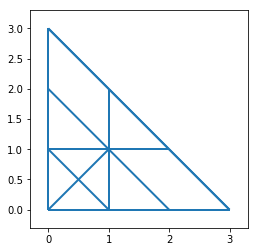

In [39]:
# this is the dual polyhedron

f3 = "(t**(2)*u**2 + u*w + t**(3)*w**2 + t**(1)*w + u + 1)*(t**7*u + t**6*w + 1)"
plot_2d_refinement(tropical_polyhedron(f3));

The two parallelograms are of area $1$. This means that the intersection is transverse.

### Smoothness of a curve

A tropical curve is smooth if the triangulation is unimodular, i.e. the area of each triangle is 1/2. 

We have already encountered examples of smooth and non-smooth curves.

## Gromov-Witten invariants

Gromov Witten invariants are integer numbers $N_{d,g}$ corresponding to the number of curves of degree $d$ and genus $g$ passing through $g + 3d -1$ points.

It is possible to compute these numbers tropically. The procedure is to compute the **simple curves** (i.e. curves whose polytope contains only triangles or parallelograms) of genus $g$ (i.e. number of internal holes) and degree $d$ (recalling that the degree is the number of infinite rays) and weight them by the **contribution factor** (this is defined as the product of all normalised triangles areas of the dual polytope)

## Appendix: Gröbner fan

Let's call $I \subset k[x_1, ... , x_n]$ be an ideal. 

Let $f \in I$ and let us define the *initial form* of $f$:

$$in_w(f) = t^{trop(f)}f(t^{w_1}x_1,...,t^{w_n}x_n)$$

and the initial ideal:

$$in_w(I) = <in_w(f), f \in I>.$$

A Gröbner basis is a set $\{g_1,...g_m\}$ such that $<in_w(g_1),...,in_w(g_m)> = I$.
Notice that $w$ is a parameter (and it varies into the *valuation group*). Let's think for now as $w \in \mathbb Q^n$.

Let's define the Gröbner complex:
$$ C_I[w] = \{ w' \in \mathbb R^n | in_w(I) = in_{w'}(I)\}$$

If we consider the trivial valuation when building the *initial ideals*, then we reduce to the **Gröbner fan** of $I$.

Notice that since the *initial ideals* are homogeneous, we can quotient out by a special $w$: $\mathbb 1 = (1,1,1,...,1)$. So $C_I[w]$ is a rational polyhedral complex (i.e. a bunch of polyhedra properly glued together)... but wait, this is exacly how a toric varity looks like! So, the Gröbner complex of the ideal (when removed the $\mathbb 1$ ) is splitting the space into regions: each region is an equivalence class of the *initial ideals*.

Basically, when varying $w$, you move through all the possible reduced Gröbner bases and we get a fan of Cones, each repressenting a reduced Gröbner bases.

Any cone in the Gröbner fan is called a Gröbner cone. The relative interior of any Gröbner cone is an equivalence class. The equivalence class containing 0 is a subspace of $\mathbb R^n$ called the **homogeneity space** of $I$. 

The Gröbner fan is a polyhedral fan. The support of the Gröbner fan i.e. the union of its cones is called the Gröbner region of $I$. 

The **lineality space** of a polyhedral cone is defined as the largest subspace contained in the cone. The common lineality space of all cones in the Gröbner fan equals the homogeneity space of I.

In [40]:
x,y = QQ['x,y'].gens()
I = QQ['x,y'].ideal(x^2 - y^2 + 1)
g = I.groebner_fan()  # each maximal cone corresponds to a reduced Grobner basis
g.reduced_groebner_bases()

[[x^2 - y^2 + 1], [-x^2 + y^2 - 1]]

In [41]:
g.polyhedralfan().rays()

[[-1, 0], [0, -1], [1, 1]]

A tropical basis is a generating set $<f_1,...,f_m>$ of the ideal $I$ such that $trop(f_i)(w)$ has a unique minimum.

In [42]:
assert I.dimension() == 1  # the Krull dimensions of the ideal is 1, then it represents a curve
# this is the basis of the tropical curve
g.tropical_basis()  # this is the same as the defining ideal

[x^2 - y^2 + 1]

In [43]:
g.tropical_intersection().rays()  # the rays of a curve, as expected

[[-1, 0], [0, -1], [1, 1]]

In [44]:
fan = g.polyhedralfan()
fan.rays()

[[-1, 0], [0, -1], [1, 1]]

In [45]:
fan.fan_dict

{'AMBIENT_DIM': ['2'],
 'DIM': ['2'],
 'LINEALITY_DIM': ['0'],
 'RAYS': ['-1 0\t# 0', '0 -1\t# 1', '1 1\t# 2'],
 'N_RAYS': ['3'],
 'LINEALITY_SPACE': [],
 'ORTH_LINEALITY_SPACE': ['1 0', '0 1'],
 'F_VECTOR': ['1 3 2'],
 'SIMPLICIAL': ['1'],
 'PURE': ['1'],
 'CONES': ['{}\t# Dimension 0',
  '{0}\t# Dimension 1',
  '{1}',
  '{2}',
  '{0 2}\t# Dimension 2',
  '{1 2}'],
 'MAXIMAL_CONES': ['{0 2}\t# Dimension 2', '{1 2}']}

In [46]:
fan.dim()

2

In [48]:
assert fan.ambient_dim() == I.ring().ngens()  # true for tropical varieties

In [49]:
fan.lineality_dim()

0

((0-d cone of Rational polyhedral fan in 2-d lattice N,), (1-d cone of Rational polyhedral fan in 2-d lattice N, 1-d cone of Rational polyhedral fan in 2-d lattice N, 1-d cone of Rational polyhedral fan in 2-d lattice N), (2-d cone of Rational polyhedral fan in 2-d lattice N, 2-d cone of Rational polyhedral fan in 2-d lattice N))


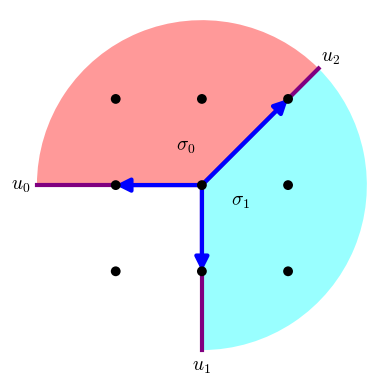

In [50]:
rat_fan = fan.to_RationalPolyhedralFan()
print(rat_fan.cones())
rat_fan.plot()

In [51]:
R.<x,y,z> = QQ[]
I = R.ideal([(x+y+z)^3-1,(x+y+z)^3-x])
gf = I.groebner_fan()
pf = gf.tropical_intersection()  # interection of all the tropical hypersurfaces defined in the ideal
print(pf.rays())
print(pf.maximal_cones())

[[-1, 0, 0], [0, -1, 0], [0, 0, -1], [1, 1, 1]]
{2: [[1, 2], [0, 3], [1, 3], [2, 3]]}


In [52]:
gf.tropical_basis()

[x^3 + 3*x^2*y + 3*x*y^2 + y^3 + 3*x^2*z + 6*x*y*z + 3*y^2*z + 3*x*z^2 + 3*y*z^2 + z^3 - 1,
 x^3 + 3*x^2*y + 3*x*y^2 + y^3 + 3*x^2*z + 6*x*y*z + 3*y^2*z + 3*x*z^2 + 3*y*z^2 + z^3 - x,
 x - 1,
 x^2*y + 1/3*y^3 + y^2*z + y*z^2 + 1/3*z^3 + y^2 + 2*y*z + z^2 + z]

In [53]:
rpf = pf.to_RationalPolyhedralFan()
rpf.plot()

Graphics3d Object

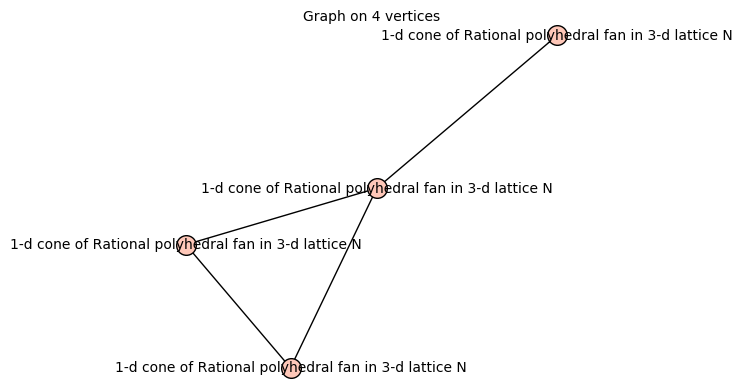

In [54]:
rpf.vertex_graph()

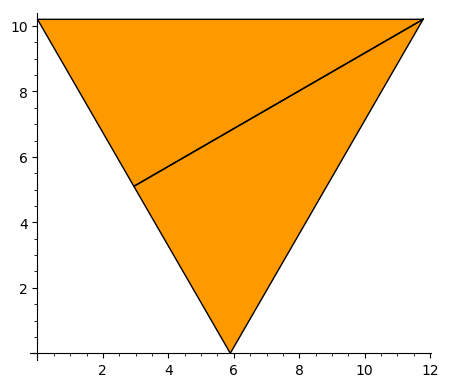

In [55]:
gf.render()

In [56]:
r3.<t,x,y,z> = PolynomialRing(QQ, 4)
g = r3.ideal([t*x^3+t*y, y^3+t^2*z]).groebner_fan()
g.weight_vectors()

[(1, 1, 1, 2), (6, 1, 4, 1), (1, 1, 4, 9), (1, 1, 4, 6), (1, 1, 2, 3)]

In [57]:
g.render3d()

Graphics3d Object